## Import the packages requiered for the example

In [1]:
"""
Created on Fri Jul 26 10:26:38 2019

@author: henok
"""
import PIL.Image as Image
from torchvision import models
import keras
from CNNFilterVisualizer import FilterVisualizer

Using TensorFlow backend.
/home/henok/onnx-tensorflow/onnx_tf/common/__init__.py:87: UserWarning: onnx_tf.common.get_outputs_names is deprecated. It will be removed in future release. Use TensorflowGraph.get_outputs_names instead.
  warnings.warn(message)



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



## Load the image from disk and format according to the network we use

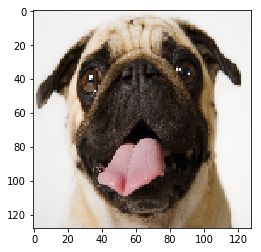

In [2]:
import numpy as np
import matplotlib.pyplot as plt
original_image = Image.open("./images/dog.jpg").convert('RGB')
image = original_image.resize((128, 128))
image = np.array(image)
image = image.reshape(1, 128, 128, 3)
image = np.transpose(image, (0, 3, 1, 2))
plt.imshow(np.transpose(image[0], (1, 2, 0)))

## Load the pretraind alexnet model using torchvision.models

In [3]:
alexnet = models.alexnet(pretrained=True)

## create an object of the **FilterVisualizer** class

In [4]:
fv = FilterVisualizer(alexnet, 'pytorch')

## Plot the first 10 filter activations for layer 5 

/home/henok/onnx-tensorflow/onnx_tf/common/handler_helper.py:37: UserWarning: Unknown op ConstantFill in domain `ai.onnx`.
  handler.ONNX_OP, handler.DOMAIN or "ai.onnx"))
/home/henok/onnx-tensorflow/onnx_tf/common/handler_helper.py:37: UserWarning: Unknown op ImageScaler in domain `ai.onnx`.
  handler.ONNX_OP, handler.DOMAIN or "ai.onnx"))
/home/henok/onnx-tensorflow/onnx_tf/common/handler_helper.py:34: UserWarning: Fail to get since_version of IsInf in domain `` with max_inclusive_version=9. Set to 1.
  handler.ONNX_OP, handler.DOMAIN, version))
/home/henok/onnx-tensorflow/onnx_tf/common/handler_helper.py:34: UserWarning: Fail to get since_version of Mod in domain `` with max_inclusive_version=9. Set to 1.
  handler.ONNX_OP, handler.DOMAIN, version))
/home/henok/onnx-tensorflow/onnx_tf/common/handler_helper.py:34: UserWarning: Fail to get since_version of Resize in domain `` with max_inclusive_version=9. Set to 1.
  handler.ONNX_OP, handler.DOMAIN, version))
/home/henok/onnx-tensorfl

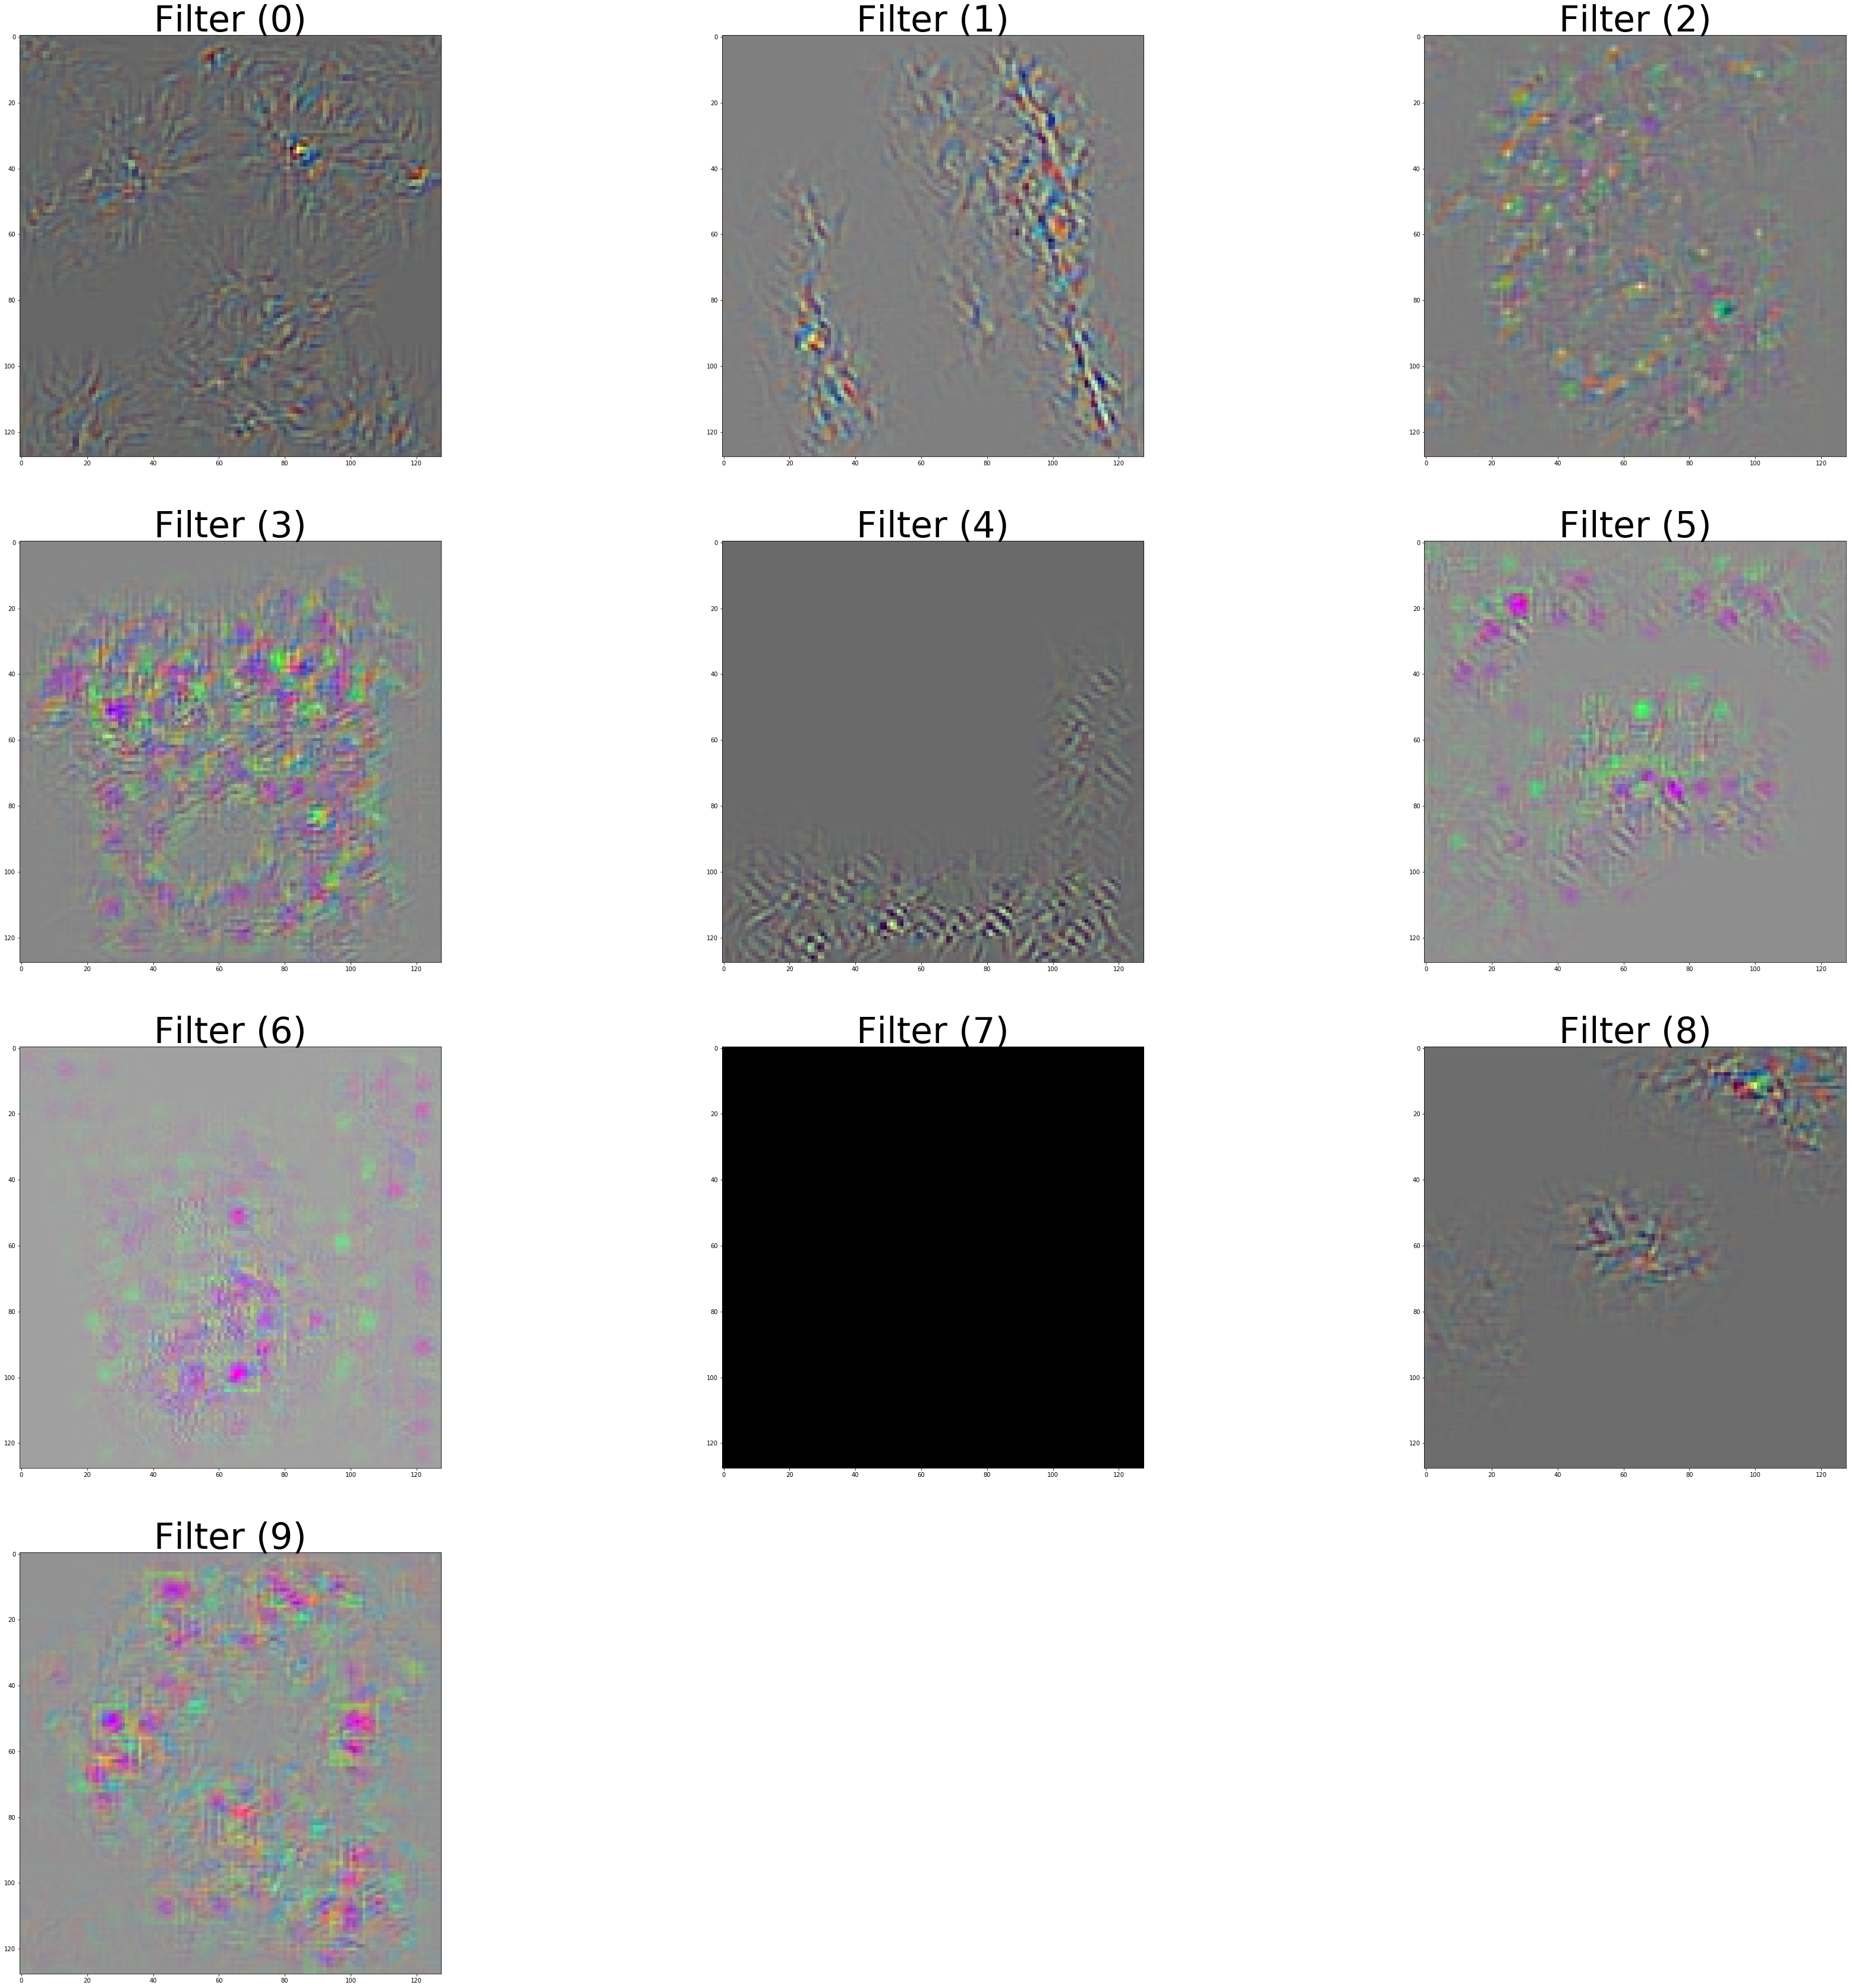

In [5]:
fv.visualize(image, 5, [0,10], normalize=True)

## Plot the first 5 activations for layer 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


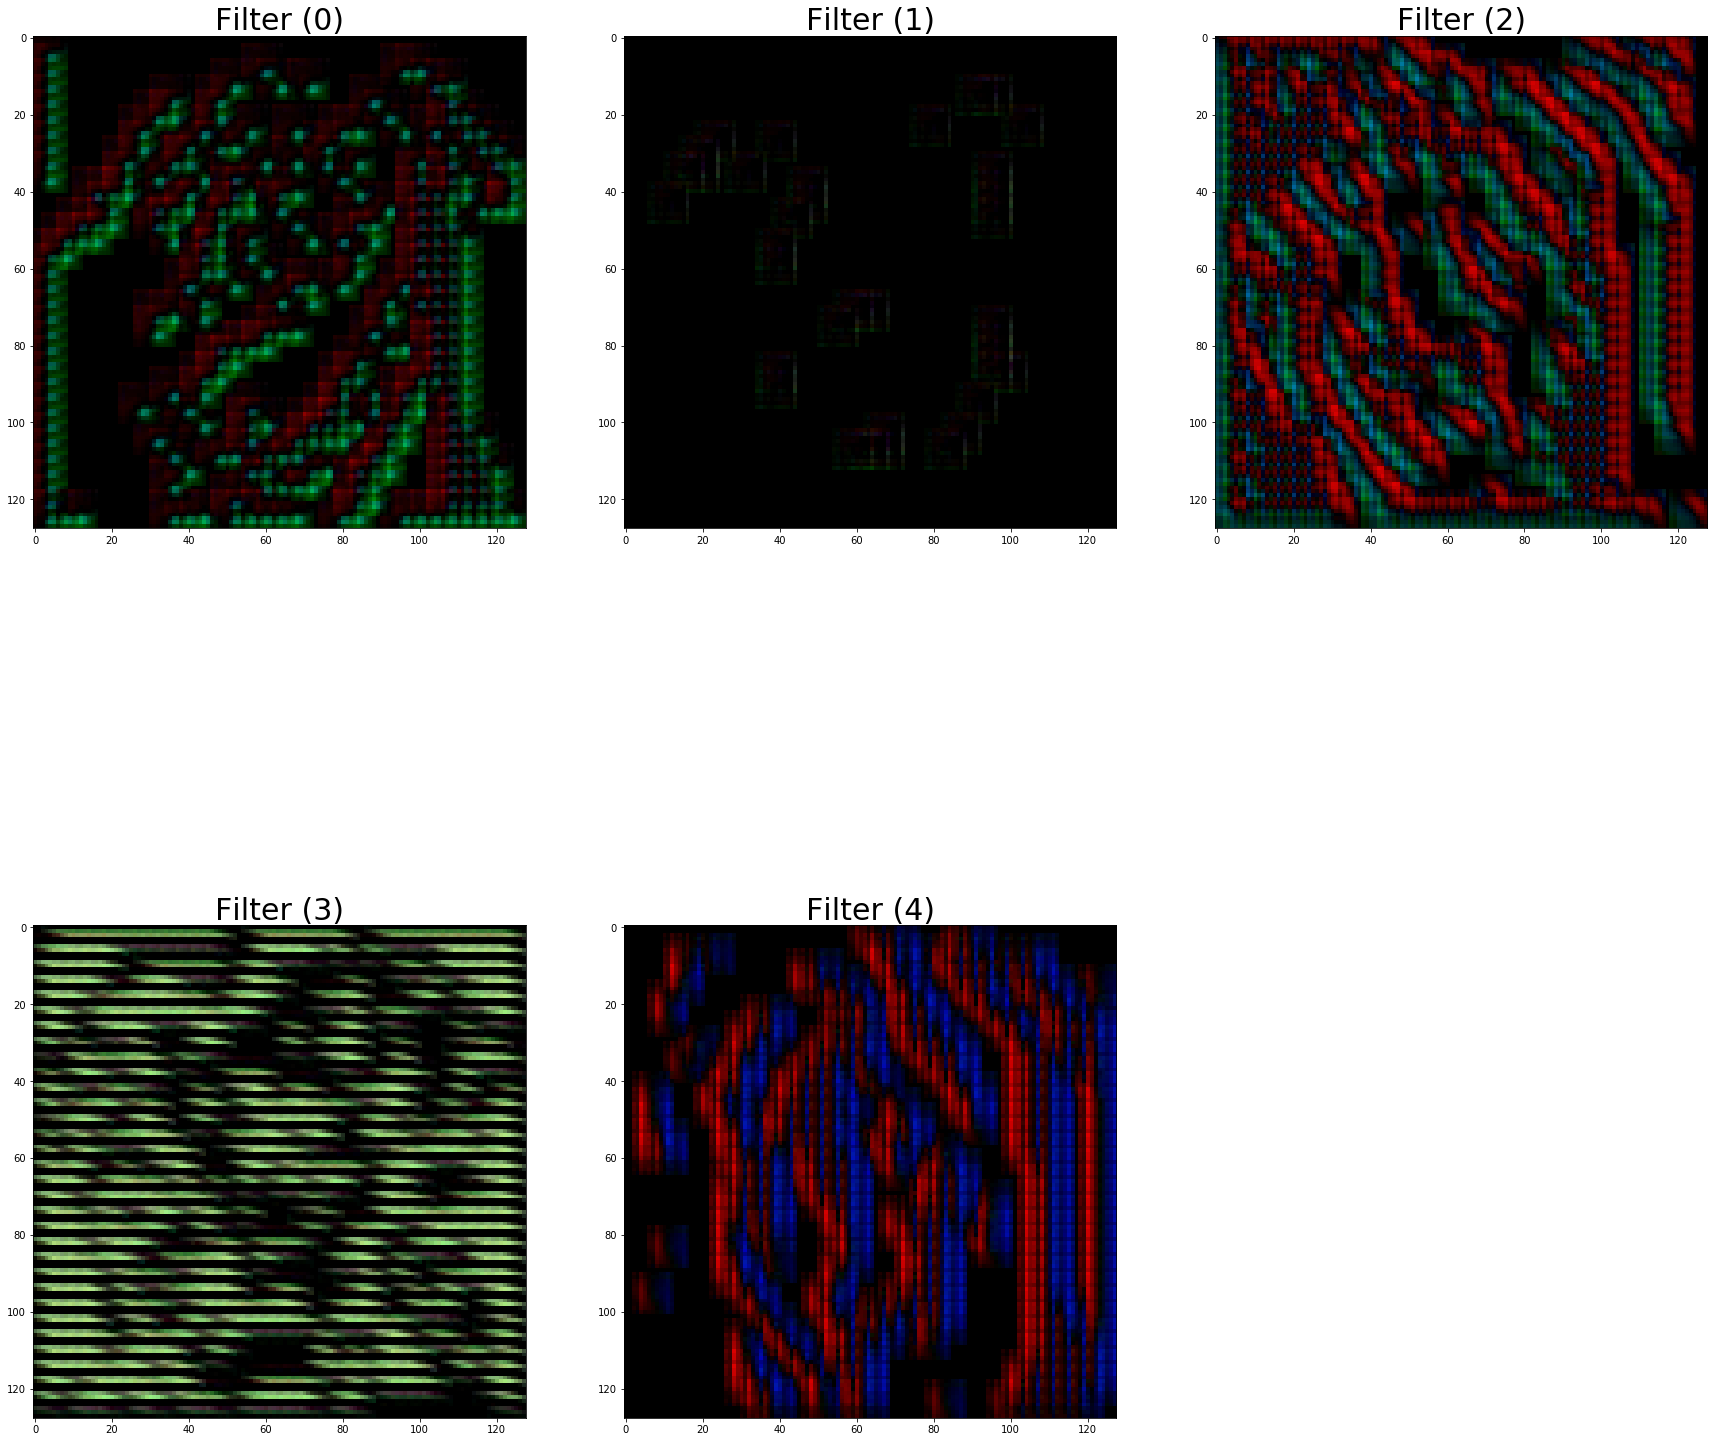

In [6]:
fv.visualize(image, 2, [0, 5], normalize=False)

## Test with keras/Tensorflow model

In [7]:
vgg16 = keras.applications.VGG16(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


## preprocess the image for the keras vgg model

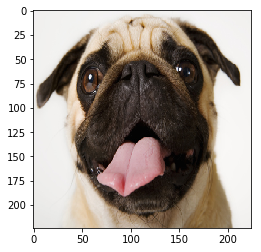

In [8]:
original_image = Image.open("./images/dog.jpg").convert('RGB')
image = original_image.resize((224, 224))
image = np.array(image)
image = image.reshape(1, 224, 224, 3)
plt.imshow((image[0]))

In [9]:
fv = FilterVisualizer(vgg16, 'tensorflow')

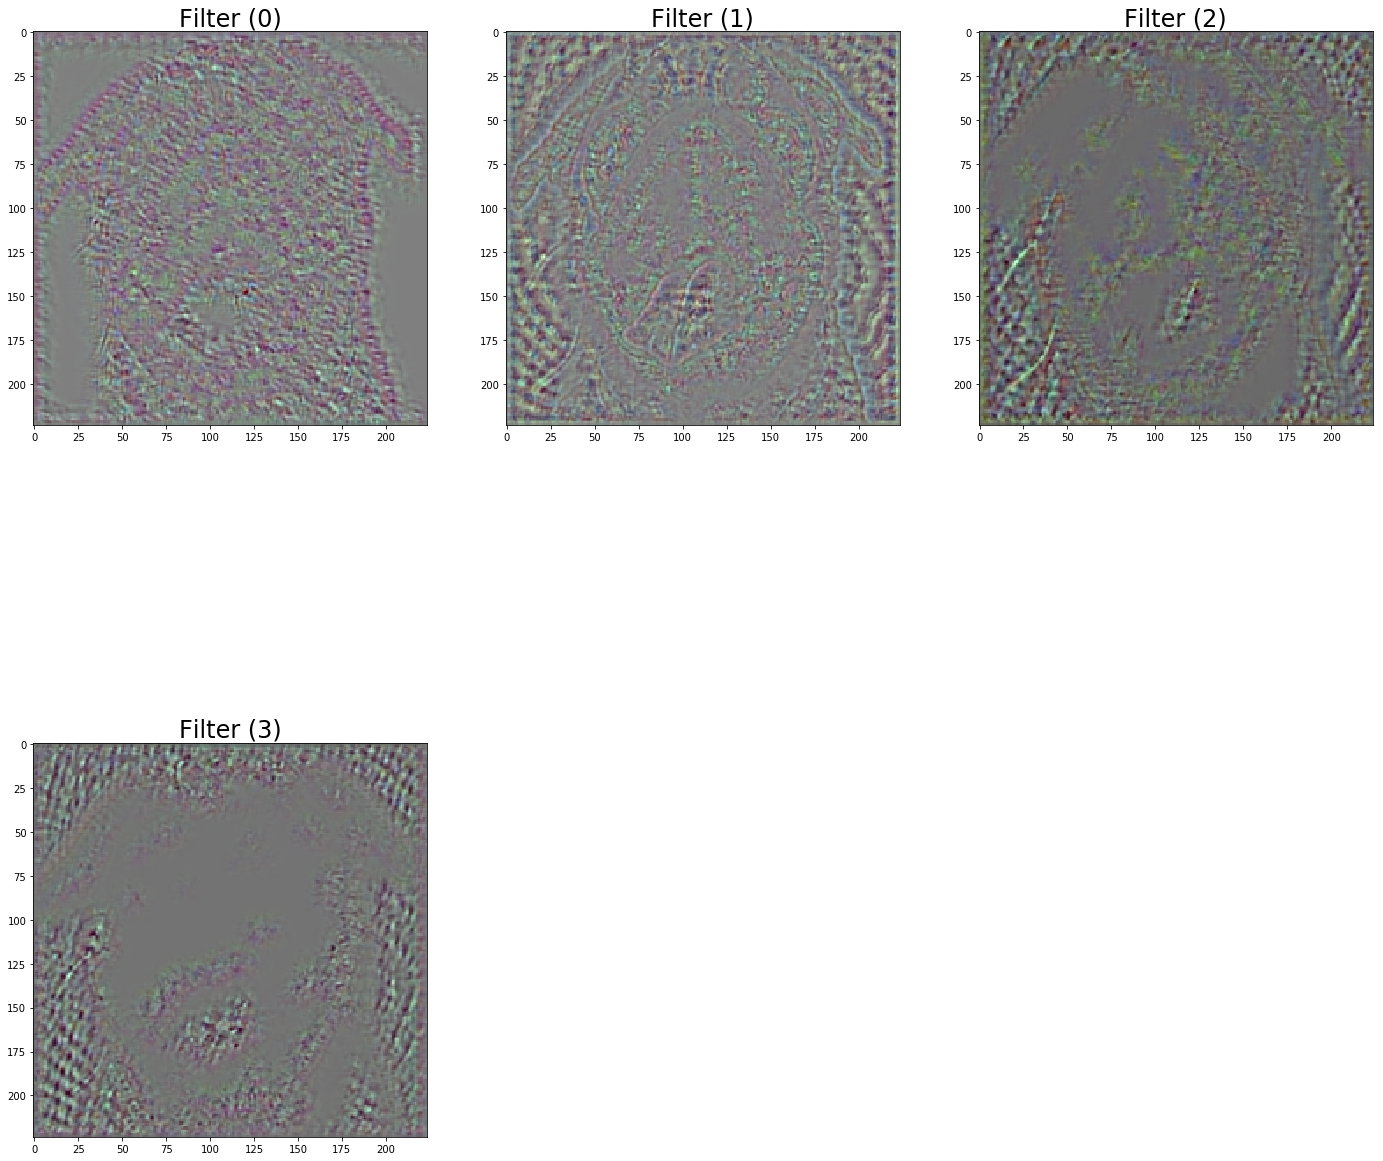

In [10]:
fv.visualize(image, 8, [0, 4], normalize=True)